In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import spatial
import cv2

In [165]:
with open('data.pkl', 'rb') as fp:
    data = pickle.load(fp)

In [166]:
data.keys()

dict_keys(['head_neck', 'lungs', 'abdomen', 'legs'])

In [167]:
# plt.imshow(data['head_neck'][100])

(32, 32)

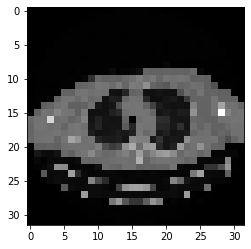

In [168]:
img1 = plt.imread('image_files/1-199.jpg')

img1 = np.average(img1, axis=2)
# img1.resize((32, 32))
img1 = cv2.resize(img1, (32, 32))

plt.imshow(img1, cmap='gray')
img1.shape

In [169]:
img1 = img1.flatten()

num_classes = len(data.keys())

max_similarity = {}
average_similarity = {}
for class_name in data.keys():

    imgs = data[class_name]
    num_imgs = len(imgs)

    # print(class_name)

    temp_similarity = []
    for i in range(num_imgs):
        temp_similarity.append(-1 * (spatial.distance.cosine(img1, data[class_name][i].flatten()) - 1))

    max_similarity[class_name] = max(temp_similarity)
    average_similarity[class_name] = np.mean(temp_similarity)



In [170]:
max_similarity

{'head_neck': 0.7843168328704275,
 'lungs': 0.9999999999999998,
 'abdomen': 0.8487238801740161,
 'legs': 0.6434632197451098}

In [171]:
average_similarity

{'head_neck': 0.5316421818115294,
 'lungs': 0.8696186091795641,
 'abdomen': 0.7956218723915897,
 'legs': 0.3703758077684436}